### ASTR 3970 / 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 15th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3.5 to 6.5. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to $\mu+\sigma_\mathrm{mean}$ and $\mu-\sigma_\mathrm{mean}$. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.5 to 5.5. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6.1\pm0.25$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6.1$ with standard deviation of $0.25$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

Part 1

In [54]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#load in data
hw_data = np.load("../../../homeworks/hw_data/hw4_data_1.npy")
measurements = hw_data[:,0]
uncertainties = hw_data[:,1]
mean = np.sum(measurements/np.power(uncertainties,2))/(np.sum(1/np.power(uncertainties,2))) #calculating the sample mean
error = (np.sum(1/np.power(uncertainties,2)))**(-1/2) #calculating the standard error
print('the mean is', mean, 'and the error is', error)


the mean is 4.942118214425304 and the error is 0.43024334605205083


Part 2

In [55]:
#the log likelihood function of a heteroscedastic gaussian
def logL(guess, measurement, errors):
    ln_likelihood = np.sum((-1/2)*np.log(2*np.pi*np.power(errors,2)))-np.sum((measurement-guess)**2/(2*np.power(errors, 2)))
    return -ln_likelihood #return the negative to minimize for optimize.fmin

from scipy import optimize
f_logL = lambda beta: logL(beta, measurements, uncertainties)

# compute the maximum likelihood 
beta0 = 3 # initial guess
beta_logL = optimize.fmin(f_logL, beta0) #minimize function
print('the best fit mean is', beta_logL)

Optimization terminated successfully.
         Current function value: 16.048013
         Iterations: 17
         Function evaluations: 34
the best fit mean is [4.94208984]


Part 3

Text(0, 0.5, 'post probability density')

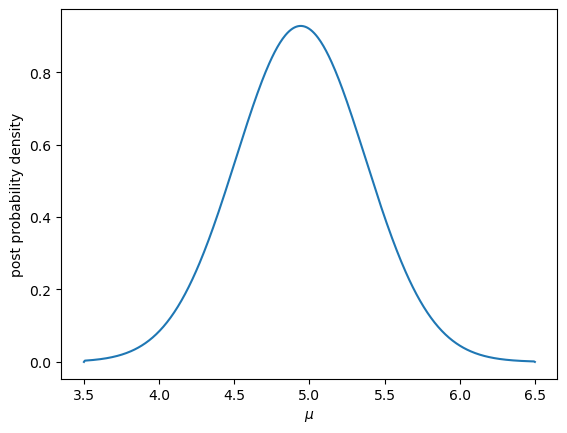

In [56]:
import scipy
from scipy.stats import norm
xgrid = np.linspace(3.5, 6.5, 500)
def Prior(vals, range1, range2):
    # create a uniform prior
    if vals > range1 and vals < range2:
        return 1
    return 0
def Posterior(guess, measurement, errors, vals, range1, range2):
    # likelihood x prior
    return np.exp(-1*logL(guess, measurement, errors))*Prior(vals, range1, range2)
#loop over all values
posterior_vals = []
for i in range(len(xgrid)):
    posterior = Posterior(xgrid[i], measurements, uncertainties, xgrid[i], 3.5,6.5)
    posterior_vals.append(posterior)
posterior_norm = posterior_vals/(np.sum(posterior_vals)*(xgrid[1]-xgrid[0])) #normalize
plt.plot(xgrid, posterior_norm)
plt.xlabel('$\mu$')
plt.ylabel('post probability density')

Part 4

credible regions: 4.51002004008016 5.369739478957916
lower and upper boundaries: 4.511874868373253 5.372361560477355
the MAP value of the mean is 4.942885771543086


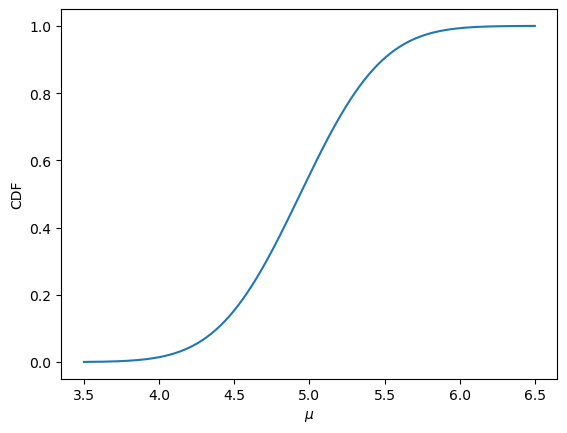

In [57]:
gaussCDF = np.cumsum(posterior_norm) #cdf of gaussian
gaussCDF_norm = gaussCDF/np.max(gaussCDF) #normalize to 1
plt.plot(xgrid,gaussCDF_norm)
plt.xlabel('$\mu$')
plt.ylabel('CDF')
tail1 = np.where(gaussCDF_norm>.1585)[0][0] #find lower tail
tail2 = np.where(gaussCDF_norm>.8415)[0][0] #find upper tail
cred_mean1 = xgrid[tail1]
cred_mean2 = xgrid[tail2]
print('credible regions:', cred_mean1,cred_mean2)
print('lower and upper boundaries:', mean-error, mean+error)
map_estimate = xgrid[np.argmax(posterior_norm)]
print('the MAP value of the mean is', map_estimate)

Part 5

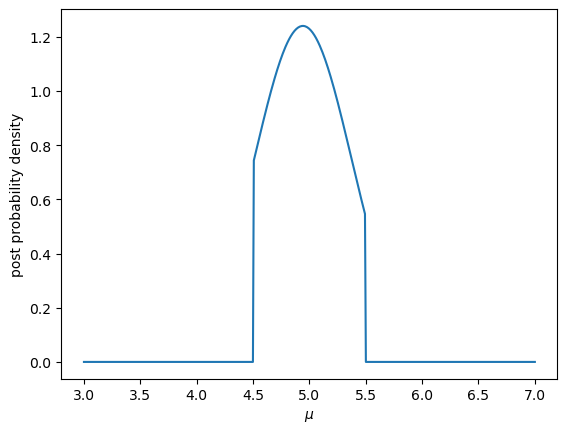

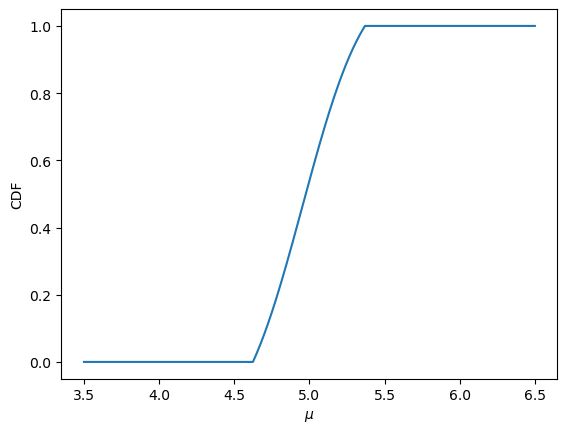

credible regions: 4.683366733466934 5.2765531062124245
lower and upper boundaries: 4.511874868373253 5.372361560477355
the MAP value of the mean is 4.942885771543086


In [58]:
#repeating part 3
xgrid_part5 = np.linspace(3, 7, 500)
posterior_vals = []
for i in range(len(xgrid_part5)):
    posterior = Posterior(xgrid_part5[i], measurements, uncertainties, xgrid_part5[i], 4.5, 5.5)
    posterior_vals.append(posterior)
posterior_norm_part5 = posterior_vals/(np.sum(posterior_vals)*(xgrid_part5[1]-xgrid_part5[0]))
plt.plot(xgrid_part5, posterior_norm_part5)
plt.xlabel('$\mu$')
plt.ylabel('post probability density')
plt.show()
#repeating part 4
gaussCDF = np.cumsum(posterior_norm_part5) #cdf of gaussian
gaussCDF_norm = gaussCDF/np.max(gaussCDF)
plt.plot(xgrid,gaussCDF_norm)
plt.xlabel('$\mu$')
plt.ylabel('CDF')
plt.show()
tail1 = np.where(gaussCDF_norm>.1585)[0][0] #find lower tail
tail2 = np.where(gaussCDF_norm>.8415)[0][0] #find upper tail
cred_mean1 = xgrid_part5[tail1]
cred_mean2 = xgrid_part5[tail2]
print('credible regions:', cred_mean1,cred_mean2)
print('lower and upper boundaries:', mean-error, mean+error)
map_estimate = xgrid[np.argmax(posterior_norm)]
print('the MAP value of the mean is', map_estimate)


Part 6

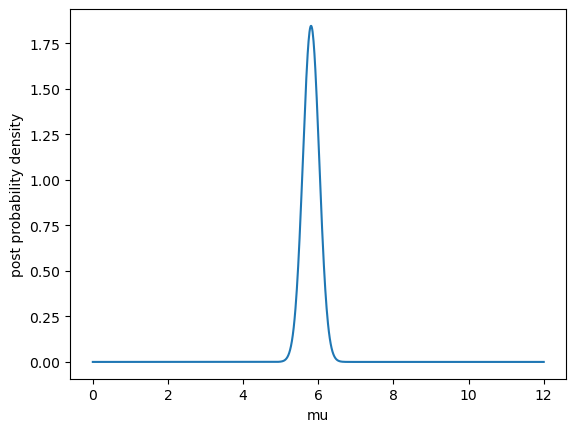

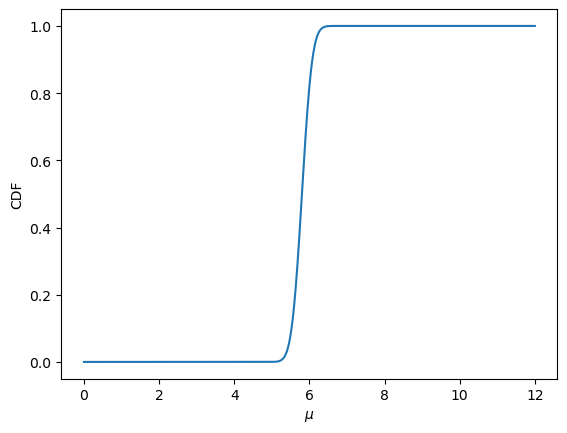

credible regions: 5.585585585585585 6.018018018018018
lower and upper boundaries: 4.511874868373253 5.372361560477355
the MAP value of the mean is 6.403807615230461


In [59]:
#repeating part 3
from scipy.stats import norm

distG = scipy.stats.norm(loc=6.1, scale=0.25) # normal distribution with mean = 6.1 and stdev = 0.35
xgrid_gauss = np.linspace(0,12,1000) # generate distribution for a uniform grid of x values
posterior_vals = []
for i in range(len(xgrid_gauss)):
    posterior = np.exp(-1*logL(xgrid_gauss[i], measurements, uncertainties))*distG.pdf(xgrid_gauss[i])
    posterior_vals.append(posterior)
posterior_norm_gauss = posterior_vals/(np.sum(posterior_vals)*(xgrid_gauss[1]-xgrid_gauss[0]))
plt.plot(xgrid_gauss, posterior_norm_gauss)
plt.xlabel('mu')
plt.ylabel('post probability density')
plt.show()
#repeating part 4
gaussCDF = np.cumsum(posterior_norm_gauss) #cdf of gaussian
gaussCDF_norm = gaussCDF/np.max(gaussCDF)
plt.plot(xgrid_gauss,gaussCDF_norm)
plt.xlabel('$\mu$')
plt.ylabel('CDF')
plt.show()
tail1 = np.where(gaussCDF_norm>.1585)[0][0] #find lower tail
tail2 = np.where(gaussCDF_norm>.8415)[0][0] #find upper tail
cred_mean1 = xgrid_gauss[tail1]
cred_mean2 = xgrid_gauss[tail2]
print('credible regions:', cred_mean1,cred_mean2)
print('lower and upper boundaries:', mean-error, mean+error)
map_estimate = xgrid[np.argmax(posterior_norm_gauss)]
print('the MAP value of the mean is', map_estimate)

Part 7

(0.0, 10.0)

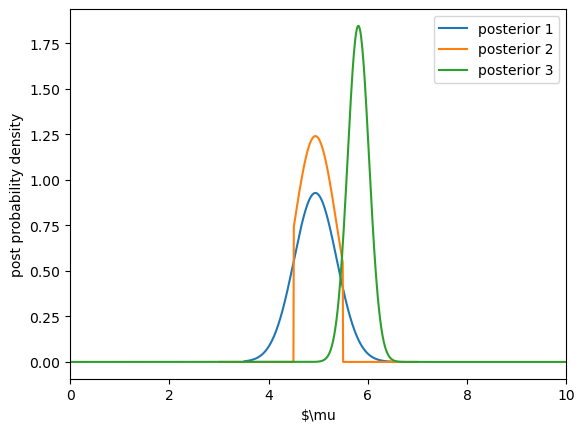

In [ ]:
#Plotting everything
plt.plot(xgrid, posterior_norm, label='posterior 1')
plt.plot(xgrid_part5, posterior_norm_part5, label='posterior 2')
plt.plot(xgrid_gauss,posterior_norm_gauss, label='posterior 3')
plt.xlabel('$\mu$')
plt.ylabel('post probability density')
plt.legend()
plt.xlim(0,10)

Part 8

In [61]:
def norm_Prior(vals, range1, range2):
    # create a uniform normalized prior
    if vals >= range1 and vals <= range2:
        return 1/(range2-range1)
    return 0
#posterior that uses the normalized prior
def norm_Posterior(guess, measurement, errors, vals, range1, range2):
    return np.exp(-1*logL(guess, measurement, errors))*norm_Prior(vals, range1, range2)

posterior_vals = []
for i in range(len(xgrid)):
    posterior = norm_Posterior(xgrid[i], measurements, uncertainties, xgrid[i], 3.5,6.5)
    posterior_vals.append(posterior)

#find evidences
area_delta = np.exp(-1*logL(mean, measurements, uncertainties)) #evidence for a delta function is just the likelihood evaluated at the mean
area_part3 = np.sum(posterior_vals)*(xgrid[1]-xgrid[0]) #integral

bfactor = area_delta/area_part3 #bayes factor
print('the bayes factor is:', bfactor, 'the delta function is preferred')
#When you know the mean exactly, you only have 1 parameter. When you have a wide prior, you have 2 parameters, the mean and the width. 
#Therefore, according to the Occam penalty, having 1 parameter is preferred.


the bayes factor is: 2.783230611230088 the delta function is preferred


## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [62]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in Lecture 9? 

### Solution

In [63]:
#part 1
x,y,sigma_y = hw_data_2 = np.load("../../../homeworks/hw_data/hw4_data_2.npy")
print(x)


[0.42 0.72 0.   0.3  0.15 0.09 0.19 0.35 0.4  0.54 0.42 0.69 0.2  0.88
 0.03 0.67 0.42 0.56 0.14 0.2 ]


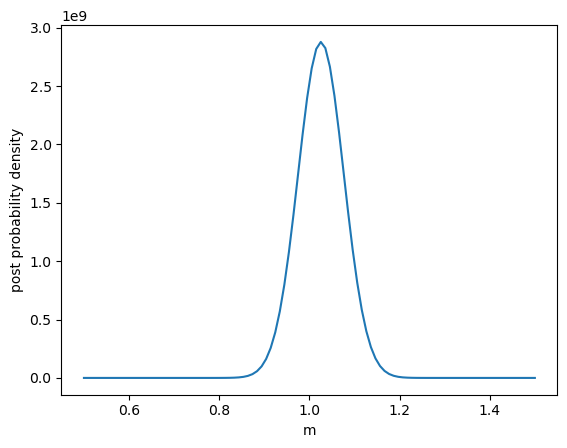

In [64]:
#part 2
xgrid_linear = np.linspace(0.5, 1.5, 100)

posterior_fit_vals = []
for i in range(len(xgrid_linear)):
    posterior_fit = np.exp(logL([-0.23,xgrid_linear[i]], hw_data_2))*norm_Prior(xgrid_linear[i], 0.5, 1.5)
    posterior_fit_vals.append(posterior_fit)
plt.plot(xgrid_linear, posterior_fit_vals)
plt.xlabel('m')
plt.ylabel('post probability density')
plt.show()

In [65]:
#part 3
area_fit = np.sum(posterior_fit_vals)*(xgrid_linear[1]-xgrid_linear[0])
print(area_fit)

365684733.1606578


In [66]:
#part 4
xgrid_quad = np.linspace(-1, 0.25, 100)
posterior_quad_vals = []
for i in range(len(xgrid_linear)):
    for j in range(len(xgrid_quad)):
        posterior_quad_fit = np.exp(logL([-0.23,xgrid_linear[i], xgrid_quad[j]], hw_data_2))*norm_Prior(xgrid_quad[j], -1, 0.25)*norm_Prior(xgrid_linear[i], 0.5, 1.5)
        posterior_quad_vals.append(posterior_quad_fit)
joint_posterior = np.reshape(posterior_quad_vals, (100,100))

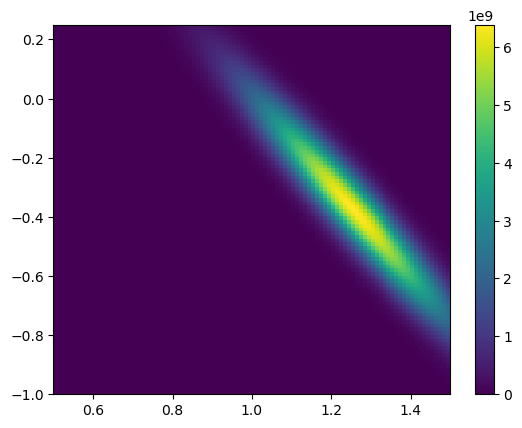

In [67]:
#plot
plt.imshow(joint_posterior.T, origin='lower',
           extent=(xgrid_linear[0], xgrid_linear[-1], xgrid_quad[0], xgrid_quad[-1]),
           aspect='auto')
plt.colorbar()


In [68]:
#part 5
area_quad = np.sum(joint_posterior)*(xgrid_quad[1]-xgrid_quad[0])*(xgrid_linear[1]-xgrid_linear[0])
print(area_quad)

493061001.6570568


In [69]:
#part 6
bfactor = area_quad/area_fit
print(bfactor)

likelihoods_joint = []
for i in range(len(xgrid_linear)):
    for j in range(len(xgrid_quad)):
        likelihood_joint = np.exp(logL([-0.23,xgrid_linear[i], xgrid_quad[j]], hw_data_2))
        likelihoods_joint.append(likelihood_joint)

likelihoods = []
for i in range(len(xgrid_linear)):
    likelihood = np.exp(logL([-0.23,xgrid_linear[i]], hw_data_2))
    likelihoods.append(likelihood)


1.3483226313427699


In [70]:
bic_joint = -2*np.log(np.sort(likelihoods_joint)[-1])+2*np.log(len(x))
bic_linear = -2*np.log(np.sort(likelihoods)[-1])+1*np.log(len(x))
print(bic_joint)
print(bic_linear)

-39.60826138257528
-40.56497783764137
